# Temat: Co z moim pociągiem?
https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france

## Cel -> analiza opóźnień pociągów we Francji

## Stakeholder -> zarządca kolejowy, który potrzebuje zidentyfikować powody opóźnień na wybranych liniach kolejowych


#### Import bibliotek

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import trains as dc
import datetime as dt
import random


## Wczytanie pliku Regularities_by_liaisons_Trains_France.csv

In [6]:
df = pd.read_csv('kaggle_data/Regularities_by_liaisons_Trains_France.csv')

## Wyświetlanie WSZYSTKICH kolumn w VS Code

In [7]:
pd.set_option('display.max_columns', None)

## Kopia zapasowa pliku CSV

In [8]:
df_clean = df.copy()

## Subtraction of canceled trips

In [9]:
df_clean['Number of circulations'] = df_clean['Number of expected circulations'] - df_clean['Number of cancelled trains']
df_clean['Number of circulations']

0       247.0
1       242.0
2       430.0
3       114.0
4       400.0
        ...  
7801    168.0
7802    199.0
7803    116.0
7804      NaN
7805     52.0
Name: Number of circulations, Length: 7806, dtype: float64

### Connection two columns 'Departure station' and 'Arrival station' TRAINLINE

#### Delete 2 columns, Drop treshold of 5% missing values

In [10]:
df_clean.drop(columns = ['Comment (optional) delays at departure', 'Comment (optional) delays on arrival'], inplace = True)

col_to_drop = dc.drop_treshold(df_clean)

df_clean.dropna(subset = col_to_drop, inplace = True)

In [11]:
df_clean['Trainline'] = df_clean['Departure station'] + ' - ' + df_clean['Arrival station']
df_clean['Trainline']

0                 ANGOULEME - PARIS MONTPARNASSE
1         PARIS MONTPARNASSE - LA ROCHELLE VILLE
2                   LE MANS - PARIS MONTPARNASSE
3                   ST MALO - PARIS MONTPARNASSE
4       PARIS MONTPARNASSE - ST PIERRE DES CORPS
                          ...                   
7800            AIX EN PROVENCE TGV - PARIS LYON
7801                    PARIS LYON - AVIGNON TGV
7802           PARIS LYON - MARSEILLE ST CHARLES
7803                          PARIS LYON - NIMES
7805                         TOULON - PARIS LYON
Name: Trainline, Length: 7520, dtype: object

### Columns in df_clean

In [12]:
df_clean.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains >

In [13]:
df_clean.head(5)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Number of circulations,Trainline
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,247.0,ANGOULEME - PARIS MONTPARNASSE
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,242.0,PARIS MONTPARNASSE - LA ROCHELLE VILLE
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,430.0,LE MANS - PARIS MONTPARNASSE
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,114.0,ST MALO - PARIS MONTPARNASSE
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,400.0,PARIS MONTPARNASSE - ST PIERRE DES CORPS


#### Zrobić regresję regplot(), modelowanie, WSPÓŁLINIOWOŚĆ

In [14]:
df_clean['Year'].value_counts()

Year
2018    1486
2019    1465
2017    1342
2016    1297
2015    1295
2020     635
Name: count, dtype: int64

In [15]:
df_clean.groupby("Average travel time (min)")["Number of expected circulations"].mean().nlargest(10)

#result_df = pd.DataFrame({'Average travel time (min)': numb_expected_circulations.index, 'Number of expected circulations': numb_expected_circulations.values})

Average travel time (min)
148.309724    960.0
142.443670    896.0
142.167051    894.0
141.071174    878.0
140.289346    876.0
143.052934    871.0
141.109827    870.0
142.851415    864.0
143.317967    858.0
140.895270    844.0
Name: Number of expected circulations, dtype: float64

### Average 'Number of circulations'

In [16]:
avg_num_circulations = df_clean['Number of circulations'].mean()

delays_circ = df_clean[df_clean['Number of circulations'] > avg_num_circulations]
delays_circ_sorted = delays_circ.sort_values(by='Number of circulations', ascending = False)

avg_num_circulations

263.1601063829787

# >>>Weighted average<<<

In [17]:
w_sum_late_arriving = (delays_circ_sorted['Number of circulations'] * delays_circ_sorted['Average delay of late arriving trains (min)']).sum()
w_sum_all_arriving = (delays_circ_sorted['Number of circulations'] * delays_circ_sorted['Average delay of all arriving trains (min)']).sum()

w_late_arriving = w_sum_late_arriving / delays_circ_sorted['Number of circulations'].sum()
w_all_arriving = w_sum_all_arriving / delays_circ_sorted['Number of circulations'].sum()

print(f"Średnia ważona dla 'Average delay of LATE arriving trains (min)': {w_late_arriving:.2f}")
print(f"Średnia ważona dla 'Average delay of ALL arriving trains (min)': {w_all_arriving:.2f}")

Średnia ważona dla 'Average delay of LATE arriving trains (min)': 30.38
Średnia ważona dla 'Average delay of ALL arriving trains (min)': 4.80


In [18]:
'''top_5_late_arriving = delays_circ_sorted[delays_circ_sorted['Number of circulations'] > w_avg_late_arriving]

print(f"Połączenia z największą średnią ważoną dla 'Average delay of LATE arriving trains (min)':\n{top_5_late_arriving.head(10)}")'''

'top_5_late_arriving = delays_circ_sorted[delays_circ_sorted[\'Number of circulations\'] > w_avg_late_arriving]\n\nprint(f"Połączenia z największą średnią ważoną dla \'Average delay of LATE arriving trains (min)\':\n{top_5_late_arriving.head(10)}")'

In [19]:
'''top_5_all_arriving = delays_circ_sorted[delays_circ_sorted['Average delay of all arriving trains (min)'] > w_avg_all_arriving].head(20)

print(f"Połączenia z największą średnią ważoną dla 'Average delay of ALL arriving trains (min)':\n{top_5_all_arriving.head(20)}")'''

'top_5_all_arriving = delays_circ_sorted[delays_circ_sorted[\'Average delay of all arriving trains (min)\'] > w_avg_all_arriving].head(20)\n\nprint(f"Połączenia z największą średnią ważoną dla \'Average delay of ALL arriving trains (min)\':\n{top_5_all_arriving.head(20)}")'

In [20]:
max_delay = df['Average delay of all departing trains (min)'].max()

delay_all_departing = df['Average delay of all departing trains (min)']

print(f"Największe opóźnienie odjeżdżającego pociągu: {max_delay:.1f} minut")


Największe opóźnienie odjeżdżającego pociągu: 173.6 minut


### Average circulations each year between 2015 and 2020

In [21]:
max_circulations_each_year = df_clean.groupby('Year')['Number of circulations'].mean()

max_circulations_each_year

Year
2015    293.460232
2016    278.312259
2017    288.956036
2018    252.541723
2019    251.645734
2020    167.314961
Name: Number of circulations, dtype: float64

### The impact of the pandemic (2020) on train delays
### 'Average delay of all departing trains (min)' and 'Average delay of late arriving trains (min)' 

In [22]:
delay_pandemic_all_arriving_trains = df_clean[(df_clean['Year'] == 2020) & (df_clean['Average delay of all arriving trains (min)'] > w_avg_all_arriving)][['Year','Trainline','Average delay of all arriving trains (min)']].sort_values(by = 'Average delay of all arriving trains (min)', ascending = False).head(10)

delay_pandemic_late_arriving_trains = df_clean[(df_clean['Year'] == 2020) & (df_clean['Average delay of late arriving trains (min)'] > w_avg_late_arriving)][['Year','Trainline','Average delay of late arriving trains (min)']].sort_values(by = 'Average delay of late arriving trains (min)', ascending = False).head(10)

delay_pandemic_all_arriving_trains


NameError: name 'w_avg_all_arriving' is not defined

### 'Number of late trains > 15min > 30min > 60min'

In [ ]:
# Grupowanie danych według roku i różnych poziomów opóźnień
arriving_delay_by_year = df_clean.groupby('Year').agg({
    'Number of late trains > 15min': 'sum',
    'Number of late trains > 30min': 'sum',
    'Number of late trains > 60min': 'sum'
}, as_index=False)

# Wyświetlenie wyników
print(arriving_delay_by_year)

      Number of late trains > 15min  Number of late trains > 30min  \
Year                                                                 
2015                        29624.0                        13125.0   
2016                        29968.0                        13362.0   
2017                        38522.0                        16756.0   
2018                        44941.0                        20509.0   
2019                        35322.0                        16530.0   
2020                         9057.0                         4061.0   

      Number of late trains > 60min  
Year                                 
2015                         5011.0  
2016                         4782.0  
2017                         5968.0  
2018                         7212.0  
2019                         6289.0  
2020                         1300.0  


### Opóźnienie w zależności od zakłóceń każdego roku

In [ ]:
delay_disruptions_of_years = df_clean.groupby('Year')[['Delay due to external causes', 'Delay due to railway infrastructure',
           'Delay due to traffic management', 'Delay due to rolling stock']].sum()


print(f"{delay_disruptions_of_years}")
#dc.barplot(delay_disruptions_of_years, 'Year', 'Delay due to external causes', 'Delays Accident')

      Delay due to external causes  Delay due to railway infrastructure  \
Year                                                                      
2015                  39223.710033                         33840.929940   
2016                  38959.180722                         34325.948601   
2017                  34044.559762                         33097.396814   
2018                  38326.397753                         34182.607987   
2019                  37121.823832                         33671.215581   
2020                  13526.558017                         22805.068791   

      Delay due to traffic management  Delay due to rolling stock  
Year                                                               
2015                     20280.159671                19320.356294  
2016                     21416.496370                17599.045671  
2017                     27528.987940                28283.253821  
2018                     30945.315196                32300.

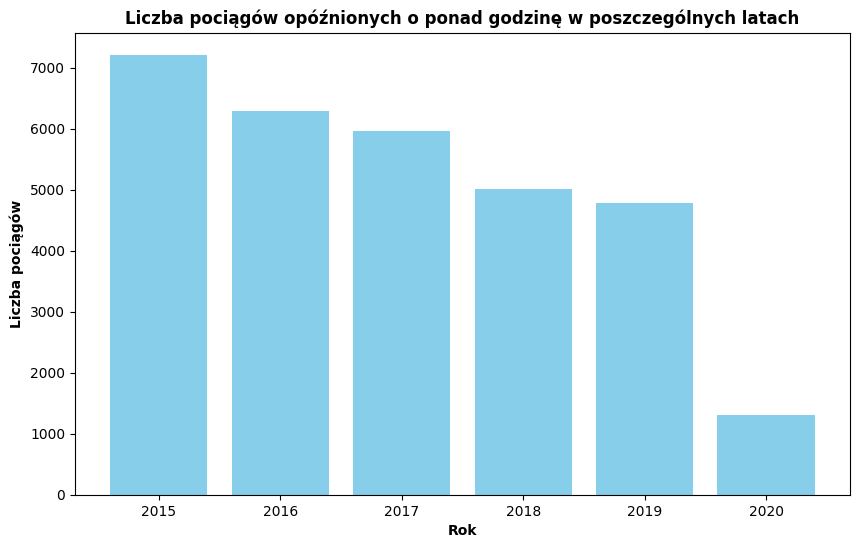

In [ ]:
plt.figure(figsize=(10, 6))

values = arriving_delay_by_year['Number of late trains > 60min'].sort_values(ascending = False)  # Wybierz odpowiednie wartości


plt.bar(arriving_delay_by_year.index, values, color='skyblue')

plt.title('Liczba pociągów opóźnionych o ponad godzinę w poszczególnych latach', fontweight = "bold")
plt.xlabel('Rok', fontweight = "bold")
plt.ylabel('Liczba pociągów', fontweight = "bold")

plt.show()

### Które opóźnienia z przyczyn zewnętrznych były najbardziej uciążliwe?

Delay due to external causes           43.124911
Delay due to railway infrastructure    41.696558
Delay due to traffic management        44.794777
Delay due to rolling stock             39.403858
dtype: float64


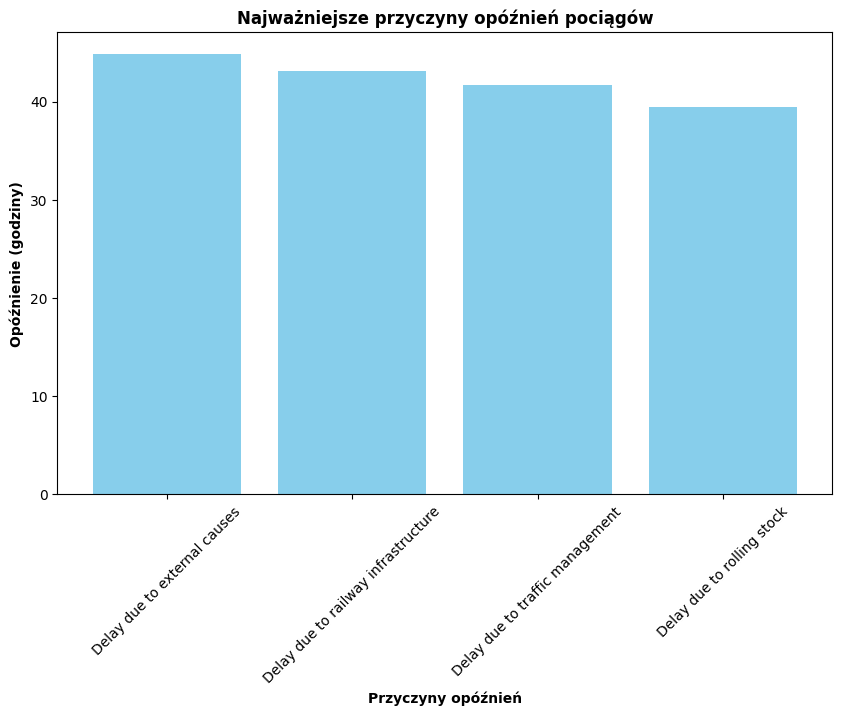

In [ ]:
disruptions_trainline = df_clean.groupby('Trainline')[['Delay due to external causes', 'Delay due to railway infrastructure',
           'Delay due to traffic management', 'Delay due to rolling stock']].sum()

top_4_disruptions = disruptions_trainline.max() / 60
print(top_4_disruptions)

values = top_4_disruptions.sort_values(ascending = False)  # Wybierz odpowiednie wartości

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(top_4_disruptions.index, values, color='skyblue')
plt.xlabel('Przyczyny opóźnień', fontweight='bold')
plt.ylabel('Opóźnienie (godziny)', fontweight='bold')
plt.title('Najważniejsze przyczyny opóźnień pociągów', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### Biggest delay trainline between 2015 and 2020

In [ ]:
biggest_delay_15_20 = df_clean[(df_clean['Year'] >= 2015) & (df_clean['Year'] <= 2020)]['Average delay of late departing trains (min)']


#### 8 największych opóźnień pociągów wraz ze stacjami

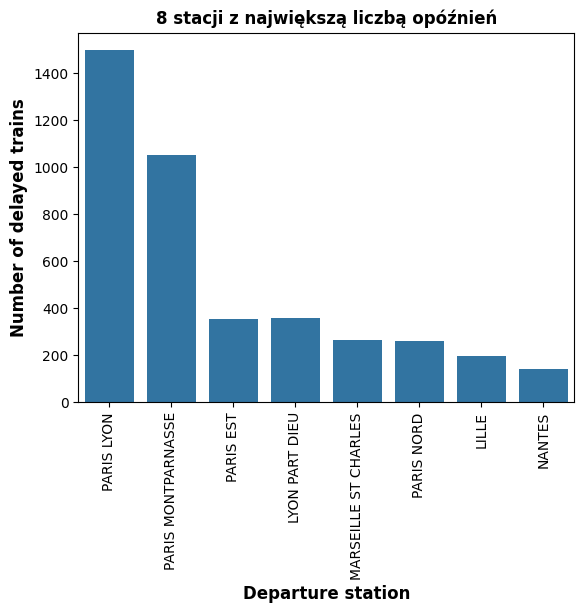

In [ ]:
colors = random.sample(sns.color_palette("husl", 10), 10)

sns.countplot(data = df_clean, x = "Departure station", order = df['Departure station'].value_counts().index[:8], legend=False)

plt.ylabel("Number of delayed trains", fontweight = "bold", fontsize = 12)
plt.xlabel("Departure station", fontweight = "bold", fontsize = 12)
plt.title('8 stacji z największą liczbą opóźnień', fontweight='bold')

plt.xticks(rotation = 90)
plt.show()

### Wszystkie przyjeżdżające pociągi i 'late arriving trains' delays in 2015-2020 

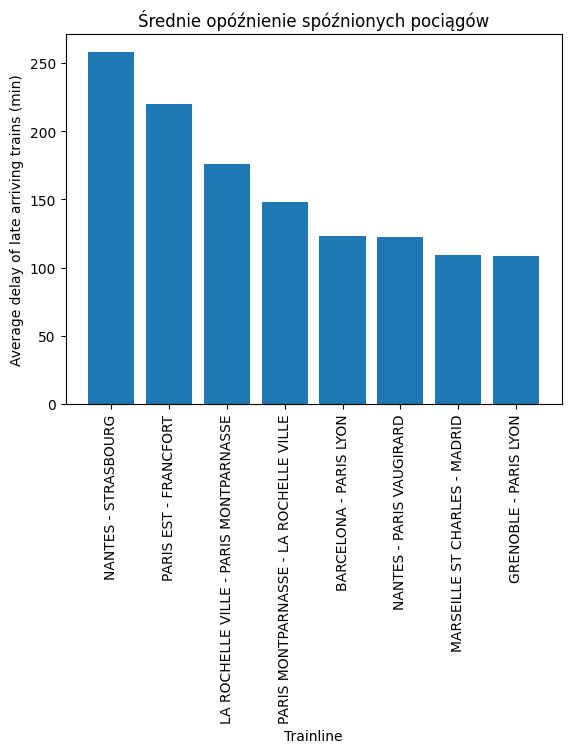

In [ ]:
import matplotlib.pyplot as plt

arriving_delay_trains = df_clean[df_clean['Average delay of all arriving trains (min)'] > w_all_arriving][['Year','Trainline','Average delay of all arriving trains (min)']].sort_values(by = 'Average delay of all arriving trains (min)', ascending = False).head(8)
late_delay_trains = df_clean[df_clean['Average delay of late arriving trains (min)'] > w_all_arriving][['Year','Trainline','Average delay of late arriving trains (min)']].sort_values(by = 'Average delay of late arriving trains (min)', ascending = False).head(8)

plt.bar(late_delay_trains['Trainline'], late_delay_trains['Average delay of late arriving trains (min)'])
plt.xlabel('Trainline')
plt.ylabel('Average delay of late arriving trains (min)')
plt.title('Średnie opóźnienie spóźnionych pociągów')
plt.xticks(rotation=90)  # Obróć etykiety osi x, aby były czytelne
plt.show()

### Rozw. Zuzi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
connections_list = [
    "LYON PART DIEU - LILLE",
    "MACON LOCHE - PARIS LYON",
    "LYON PART DIEU - RENNES",
    "DOUAI - PARIS NORD",
    "MARNE LA VALLEE - LYON PART DIEU",
    "SAINT ETIENNE CHATEAUCREUX - PARIS LYON",
    "LYON PART DIEU - MARNE LA VALLEE",
    "VALENCE ALIXAN TGV - PARIS LYON"
]
filtered_df = df_clean[df_clean['Trainline'].isin(connections_list)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Trainline', y='Average delay of late arriving trains (min)', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Boxplot średniego opóźnienia dla wybranych połączeń')
plt.xlabel('Połączenie')
plt.ylabel('Średnie opóźnienie (min)')
plt.tight_layout()
plt.show()
